720 720
722 722
724 724
726 726
728 728
730 730


C:\Users\Sashka\AppData\Local\Temp/ipykernel_14896/3978823816.py:22: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plot.subplots_adjust(hspace=1)


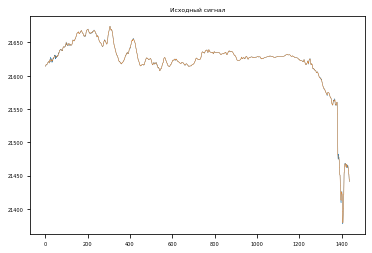

In [7]:
import pywt
import pet2017 as pet
import matplotlib.pyplot as plot
import numpy as np

quiet1 = [*pet.data_by_month('2017-09-07')["PETH"]]

[A2, D1] = pywt.dwt(quiet1, 'db1')
[A2, D2] = pywt.dwt(A2, 'db1')

D1 *= 0

A = pywt.idwt(A2, D2, 'db1')

quiet1_0 = pywt.idwt(A, D1, 'db1')

fig, axs = plot.subplot_mosaic([['c-0']],
                              constrained_layout=True)

#plot.rcParams['figure.dpi'] = 170
plot.rcParams['font.size'] = 5
plot.subplots_adjust(hspace=1)

axs['c-0'].set_title("Исходный сигнал")
#axs['c-1-1'].set_title("Восстановленный сигнал")

axs['c-0'].plot(quiet1, linewidth=0.4)
axs['c-0'].plot(quiet1_0, linewidth=0.4)

E1 = np.linalg.norm(quiet1 - quiet1_0)


def CalcEWithDwt(signal, wavelet):
    [A2, D1] = pywt.dwt(signal, wavelet=wavelet)
    [A2, D2] = pywt.dwt(A2, wavelet=wavelet)
    D1 *= 0
    A = pywt.idwt(A2, D2, wavelet=wavelet)
    print(len(A), len(D1))
    signal_reconstruct = pywt.idwt(A, D1, wavelet=wavelet)
    E = np.linalg.norm(signal - signal_reconstruct)
    return (E, signal_reconstruct)

[E1, sr] = CalcEWithDwt(quiet1, 'db1')
[E3, sr] = CalcEWithDwt(quiet1, 'db3')
[E5, sr] = CalcEWithDwt(quiet1, 'db5')
[E7, sr] = CalcEWithDwt(quiet1, 'db7')
[E9, sr] = CalcEWithDwt(quiet1, 'db9')
[E11, sr] = CalcEWithDwt(quiet1, 'db11')